# BHP

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.float_format",lambda x :"%.5f" %x)

In [3]:
df = pd.read_csv("D:/project/bhp/Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00000,1.00000,39.07000
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00000,3.00000,120.00000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00000,3.00000,62.00000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00000,1.00000,95.00000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00000,1.00000,51.00000


In [5]:
df.drop(["area_type","availability","society","balcony"],axis=1,inplace=True)

In [6]:
df.shape

(13320, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df.shape

(13246, 5)

In [12]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df["bhk"] = df["size"].apply(lambda X : int(X.split(" ")[0]))

In [14]:
df1 = df.copy()

In [15]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000,2
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000,4
2,Uttarahalli,3 BHK,1440,2.00000,62.00000,3
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000,3
4,Kothanur,2 BHK,1200,2.00000,51.00000,2


In [16]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df1.drop(["size"],axis=1,inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [19]:
df1["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
s = "188"
s1 = "1881 - 1911"

In [22]:
def is_float(x):
    try:
        float(x)
        return float(x)
    except:
        l = x.split(" - ")
        if len(l)==2:
            return(float(l[0])+float(l[1])/2)
        else:
            return None
        return(float(l[0])+float(l[1])/2)

In [23]:
df1.shape

(13246, 5)

In [24]:
df1['total_sqft']=df1['total_sqft'].apply(is_float)

In [25]:
df2 = df1.copy()

In [26]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4
2,Uttarahalli,1440.00000,2.00000,62.00000,3
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3
4,Kothanur,1200.00000,2.00000,51.00000,2


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [28]:
df2["per_Square_feet"] = (df2["price"]*100000)/df2["total_sqft"]

In [29]:
df2.head()

,location,total_sqft,bath,price,bhk,per_Square_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [30]:
df2["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [31]:
len(df2["location"].unique())

1304

In [32]:
location_Stat=df2.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [33]:
location_Stat

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [34]:
len(location_Stat)

1304

In [35]:
df2["location"] = df["location"].apply(lambda x : str(x))

In [36]:
df2["location"] = df["location"].apply(lambda x : x.strip())

In [37]:
less_than_10 = location_Stat[location_Stat<10]
less_than_10

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [38]:
len(less_than_10)

1051

In [39]:
df2["location"] = df2["location"].apply(lambda x : "other" if x in less_than_10 else x)

In [40]:
df2["location"]

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [41]:
df2.groupby("location")["location"].agg("count").sort_values(ascending=False)

location
other                       2716
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
                            ... 
JP nagar 9th Phase,            1
Banaswadi,                     1
Panathur Road,                 1
Electronic City Phase 1,       1
Kanakapura Road,               1
Name: location, Length: 283, dtype: int64

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         13246 non-null  object 
 1   total_sqft       13200 non-null  float64
 2   bath             13246 non-null  float64
 3   price            13246 non-null  float64
 4   bhk              13246 non-null  int64  
 5   per_Square_feet  13200 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


In [43]:
df2.describe()

,total_sqft,bath,price,bhk,per_Square_feet
count,13200.00000,13246.00000,13246.00000,13246.00000,13200.00000
mean,1563.46677,2.69259,112.38939,2.80190,7903.58229
std,1246.45155,1.34151,149.07659,1.29576,106727.69113
min,1.00000,1.00000,8.00000,1.00000,267.82981
25%,1100.00000,2.00000,50.00000,2.00000,4237.91822
50%,1277.00000,2.00000,72.00000,3.00000,5417.54502
75%,1680.00000,3.00000,120.00000,3.00000,7307.88617
max,52272.00000,40.00000,3600.00000,43.00000,12000000.00000


In [44]:
df2.head()

,location,total_sqft,bath,price,bhk,per_Square_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [45]:
df2[df2["total_sqft"]/ df2.bhk<300] #wrong data

,location,total_sqft,bath,price,bhk,per_Square_feet
9,other,1020.00000,6.00000,370.00000,6,36274.50980
45,HSR Layout,600.00000,9.00000,200.00000,8,33333.33333
58,Murugeshpalya,1407.00000,4.00000,150.00000,6,10660.98081
68,other,1350.00000,7.00000,85.00000,8,6296.29630
70,other,500.00000,3.00000,100.00000,3,20000.00000
...,...,...,...,...,...,...
13277,other,1400.00000,7.00000,218.00000,7,15571.42857
13279,other,1200.00000,5.00000,130.00000,6,10833.33333
13281,Margondanahalli,1375.00000,5.00000,125.00000,5,9090.90909
13303,Vidyaranyapura,774.00000,5.00000,70.00000,5,9043.92765


In [46]:
df3 =df2[~(df2["total_sqft"]/ df2.bhk<300)]

In [47]:
df3.head()

,location,total_sqft,bath,price,bhk,per_Square_feet
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000


In [48]:
df3.describe()

,total_sqft,bath,price,bhk,per_Square_feet
count,12456.00000,12502.00000,12502.00000,12502.00000,12456.00000
mean,1598.84155,2.56479,111.31192,2.65070,6290.29998
std,1269.66090,1.08495,152.08997,0.98170,4175.61921
min,300.00000,1.00000,9.00000,1.00000,267.82981
25%,1118.00000,2.00000,49.00000,2.00000,4186.72584
50%,1300.00000,2.00000,70.00000,3.00000,5281.69014
75%,1702.25000,3.00000,115.00000,3.00000,6904.65201
max,52272.00000,16.00000,3600.00000,16.00000,176470.58824


In [49]:
import numpy as np
def remove_outlier(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby("location"):
#         print(keys)
        m = np.mean(subdf.per_Square_feet)
        s = np.std(subdf.per_Square_feet)
        reduce_df = subdf[(subdf.per_Square_feet>(m-s))& (subdf.per_Square_feet<(m+s))]
#         print(reduce_df)
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
        print(df_out)
    return df_out

In [50]:
df4 = remove_outlier(df3)

              location  total_sqft    bath     price  bhk  per_Square_feet
0  1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1  1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2  1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3  1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4  1st Block Jayanagar  1235.00000 2.00000 148.00000    2      11983.80567
5  1st Block Jayanagar  2750.00000 4.00000 413.00000    4      15018.18182
6  1st Block Jayanagar  2450.00000 4.00000 368.00000    4      15020.40816
                 location  total_sqft    bath     price  bhk  per_Square_feet
0     1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1     1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2     1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3     1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4     1st 

                 location  total_sqft    bath     price  bhk  per_Square_feet
0     1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1     1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2     1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3     1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4     1st Block Jayanagar  1235.00000 2.00000 148.00000    2      11983.80567
...                   ...         ...     ...       ...  ...              ...
1804       Dodda Nekkundi  1370.00000 2.00000  60.00000    2       4379.56204
1805       Dodda Nekkundi  1200.00000 2.00000  71.00000    2       5916.66667
1806       Dodda Nekkundi  1585.00000 2.00000  79.00000    3       4984.22713
1807       Dodda Nekkundi  1005.00000 2.00000  45.00000    2       4477.61194
1808       Dodda Nekkundi  1264.00000 2.00000  52.00000    2       4113.92405

[1809 rows x 6 columns]
                 location  total_sqft  

                 location  total_sqft    bath     price  bhk  per_Square_feet
0     1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1     1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2     1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3     1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4     1st Block Jayanagar  1235.00000 2.00000 148.00000    2      11983.80567
...                   ...         ...     ...       ...  ...              ...
3756      Judicial Layout  1165.00000 2.00000  49.61000    2       4258.36910
3757      Judicial Layout  5400.00000 4.00000 700.00000    5      12962.96296
3758      Judicial Layout  1500.00000 3.00000 162.00000    4      10800.00000
3759      Judicial Layout   900.00000 2.00000  40.00000    2       4444.44444
3760      Judicial Layout  1989.00000 4.00000 155.00000    3       7792.86073

[3761 rows x 6 columns]
                               location

                 location  total_sqft    bath     price  bhk  per_Square_feet
0     1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1     1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2     1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3     1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4     1st Block Jayanagar  1235.00000 2.00000 148.00000    2      11983.80567
...                   ...         ...     ...       ...  ...              ...
5214          Mysore Road  1175.00000 2.00000  70.50000    2       6000.00000
5215          Mysore Road  1080.00000 2.00000  60.00000    3       5555.55556
5216          Mysore Road  1500.00000 3.00000  70.00000    3       4666.66667
5217          Mysore Road   883.00000 2.00000  37.00000    2       4190.26048
5218          Mysore Road  1082.00000 2.00000  45.00000    3       4158.96488

[5219 rows x 6 columns]
                 location  total_sqft  

                 location  total_sqft    bath     price  bhk  per_Square_feet
0     1st Block Jayanagar  2850.00000 4.00000 428.00000    4      15017.54386
1     1st Block Jayanagar  1630.00000 3.00000 194.00000    3      11901.84049
2     1st Block Jayanagar  1875.00000 2.00000 235.00000    3      12533.33333
3     1st Block Jayanagar  1200.00000 2.00000 130.00000    3      10833.33333
4     1st Block Jayanagar  1235.00000 2.00000 148.00000    2      11983.80567
...                   ...         ...     ...       ...  ...              ...
6892          Tumkur Road  1240.00000 2.00000  83.00000    3       6693.54839
6893          Tumkur Road  1027.00000 2.00000  67.00000    2       6523.85589
6894          Tumkur Road  1060.00000 2.00000  58.30000    3       5500.00000
6895          Tumkur Road   992.00000 2.00000  70.00000    2       7056.45161
6896          Tumkur Road  1354.00000 3.00000  85.86000    3       6341.21123

[6897 rows x 6 columns]
                 location  total_sqft  

In [51]:
df4.head()

,location,total_sqft,bath,price,bhk,per_Square_feet
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [52]:
df4.describe()

,total_sqft,bath,price,bhk,per_Square_feet
count,10176.00000,10176.00000,10176.00000,10176.00000,10176.00000
mean,1510.10562,2.47553,91.36477,2.57547,5656.53530
std,889.75851,0.98419,88.21019,0.89684,2300.32579
min,300.00000,1.00000,10.00000,1.00000,1250.00000
25%,1110.00000,2.00000,49.00000,2.00000,4217.21079
50%,1285.00000,2.00000,67.00000,2.00000,5166.66667
75%,1650.00000,3.00000,100.00000,3.00000,6421.80314
max,30400.00000,16.00000,2200.00000,16.00000,24509.80392


# Data visualization

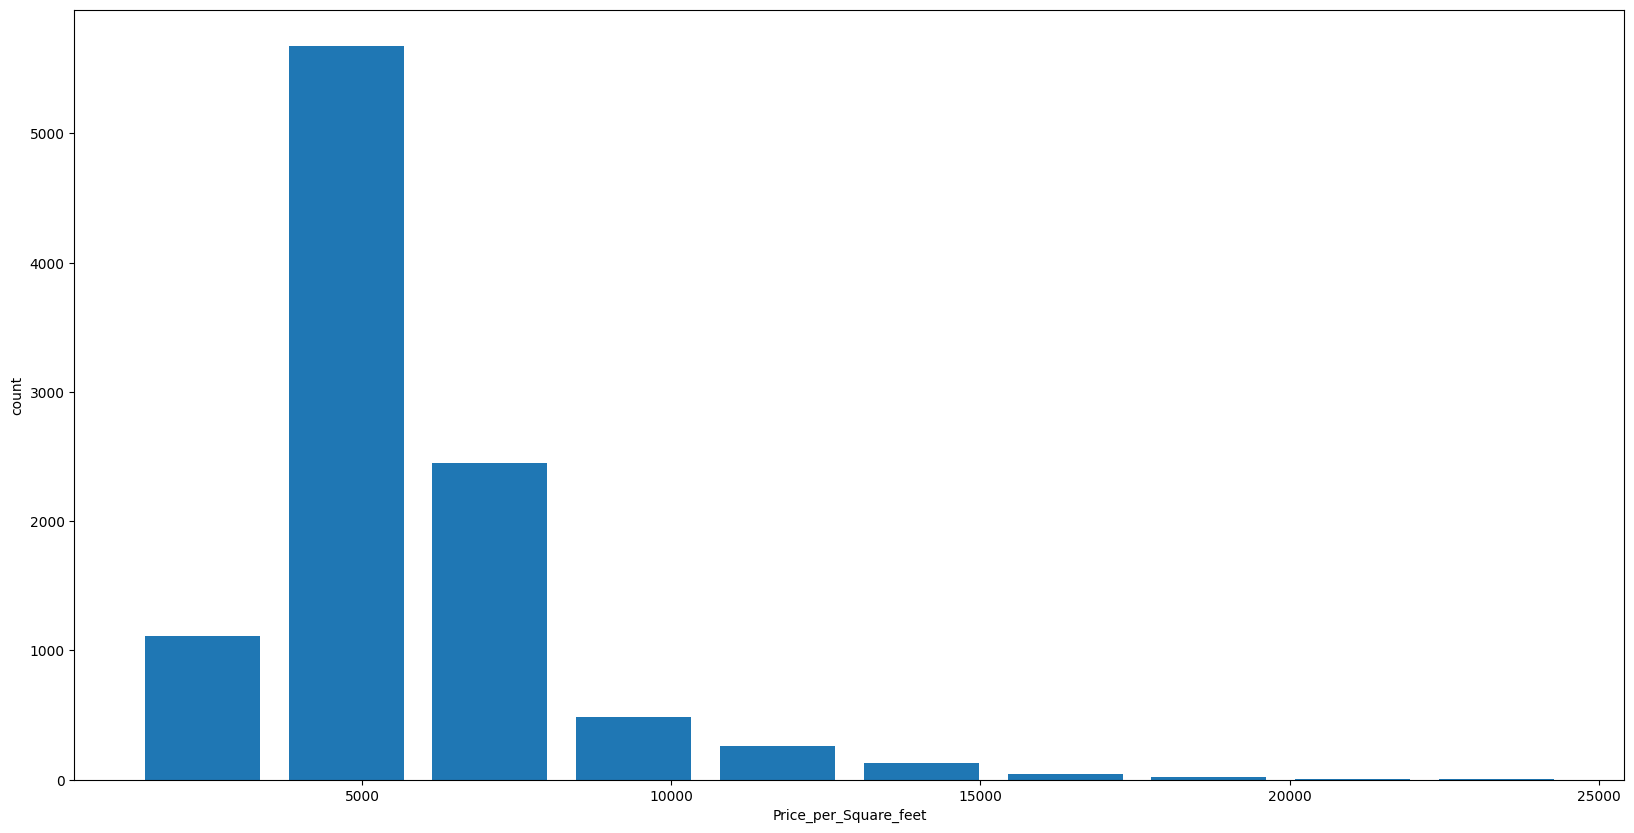

In [53]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df4.per_Square_feet,rwidth=0.8)
plt.xlabel("Price_per_Square_feet")
plt.ylabel("count")
plt.show()

# Data Cleaning and Model Building
identifying the column datatype droping unneccessary column

In [54]:
df4["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [55]:
df4.shape

(10176, 6)

In [56]:
df4[df4.bath>df4.bhk+2]

,location,total_sqft,bath,price,bhk,per_Square_feet
585,BTM 1st Stage,3300.00000,14.00000,500.00000,9,15151.51515
1641,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5295,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
6783,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433
8461,other,11338.00000,9.00000,1000.00000,6,8819.89769


In [57]:
df5 = df4[~(df4.bath>df4.bhk+2)]

In [58]:
df5.head()

,location,total_sqft,bath,price,bhk,per_Square_feet
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4,15017.54386
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3,11901.84049
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3,12533.33333
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3,10833.33333
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2,11983.80567


In [59]:
df5.drop(["per_Square_feet"],axis=1,inplace=True)

In [60]:
df5.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.00000,4.00000,428.00000,4
1,1st Block Jayanagar,1630.00000,3.00000,194.00000,3
2,1st Block Jayanagar,1875.00000,2.00000,235.00000,3
3,1st Block Jayanagar,1200.00000,2.00000,130.00000,3
4,1st Block Jayanagar,1235.00000,2.00000,148.00000,2


In [61]:
df5.shape

(10171, 5)

# Encoding the object column

In [62]:
final= pd.get_dummies(data=df5,drop_first=True,dtype=int)

In [63]:
final.head()

,total_sqft,bath,price,bhk,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.00000,4.00000,428.00000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.00000,3.00000,194.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.00000,2.00000,235.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.00000,2.00000,130.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.00000,2.00000,148.00000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
final.shape

(10171, 263)

In [65]:
X = final.drop("price",axis=1)
y = final.price

# Scalling

In [66]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)

# model building
preparing data for model building

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
X_train.shape

(8136, 262)

In [69]:
X_test.shape

(2035, 262)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)

In [82]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

In [83]:
rf.score(X_test,y_test)

0.6822936530908226

In [89]:
pred = rf.predict(X_test)
pred

array([122.12349206,  51.77933333,  71.91359444, ...,  87.90719379,
        45.02356603,  75.2539295 ])

# Regression model using LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
model.score(X_test,y_test)

0.7278586411631645

In [73]:
pred = model.predict(X_test)
pred

array([145.75487835,  42.84555142, 179.95573321, ...,  95.35432855,
        67.93925566,  80.77505881])

In [74]:
import seaborn as sns

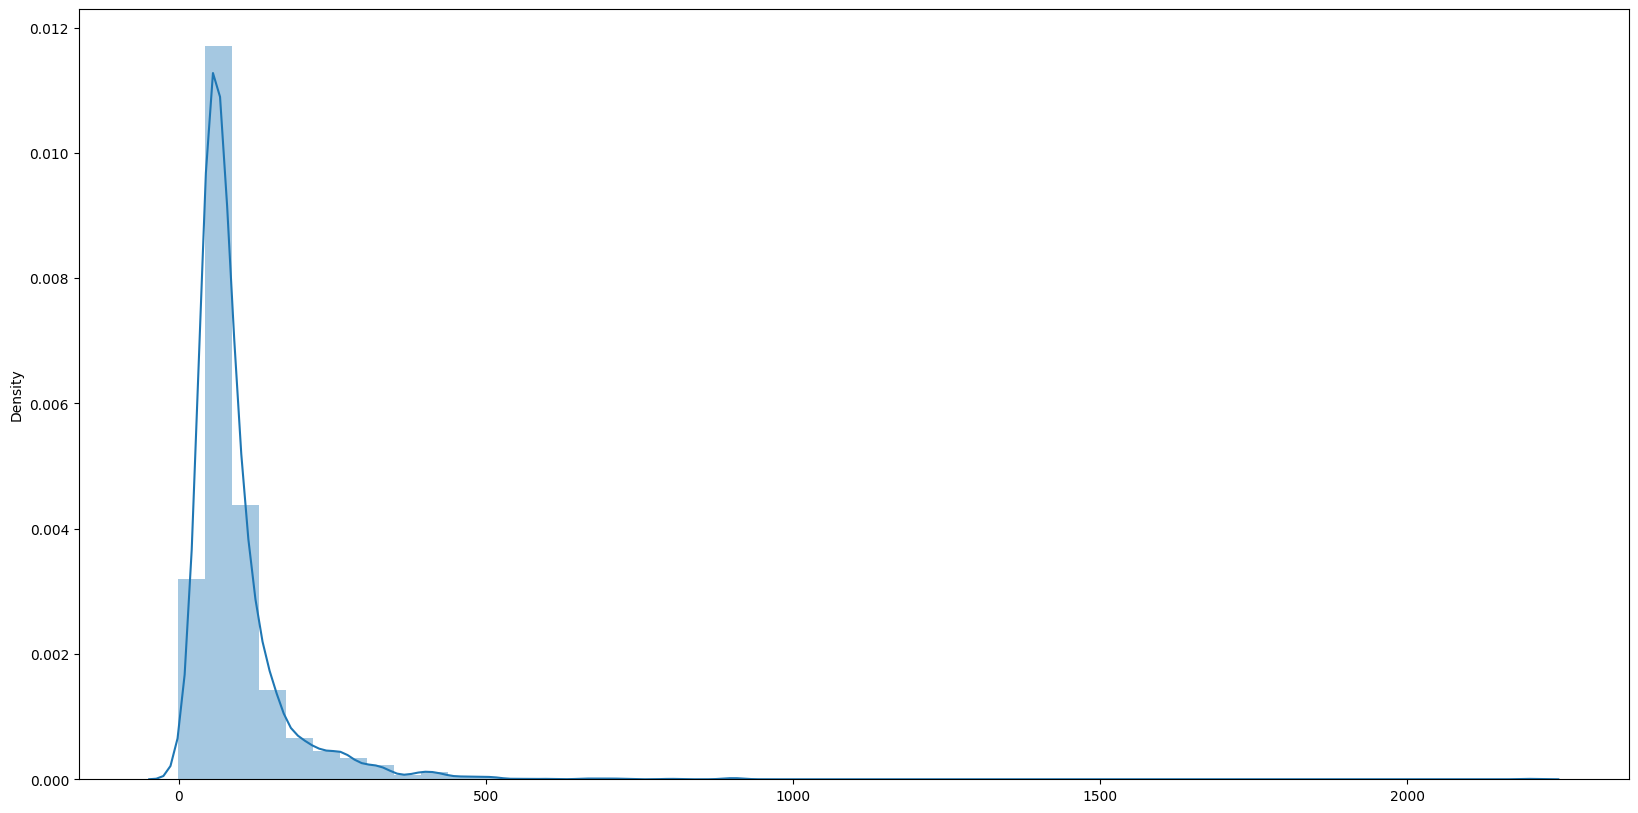

In [75]:
sns.distplot((y_test,pred))
plt.show()